# 🧪 Dynamic Simulation and Optimization of a Continuous Bioreactor (Chemostat)

---

## 📘 Project Overview

In this project, we simulate and analyze a **continuous bioreactor (chemostat)** used in industrial biotechnology for microbial cultivation and product formation. The goal is to understand how changes in process parameters affect biomass and substrate concentrations over time and at steady state.


---

## 🧮 Mathematical Model

We model a basic chemostat with Monod kinetics using the following system of differential equations:
$$
\frac{dS}{dt} = D(S_{\text{in}} - S) - \frac{\mu_{\text{max}} \cdot S}{K_s + S} \cdot \frac{X}{Y}
$$

$$
\frac{dX}{dt} = \left(\frac{\mu_{\text{max}} \cdot S}{K_s + S} - D \right)X
$$

Where:

| Symbol         | Meaning                                      |
|----------------|----------------------------------------------|
| S              | Substrate concentration (g/L)                |
| X              | Biomass concentration (g/L)                  |
| D              | Dilution rate (1/hr)                         |
| S_in           | Feed substrate concentration (g/L)           |
| mu_max         | Maximum specific growth rate (1/hr)          |
| Ks             | Monod constant (g/L)                         |
| Y              | Yield coefficient (g biomass / g substrate)  |


---

## 🎯 Objectives

- Simulate the dynamics of biomass and substrate in a chemostat.
- Visualize how system variables evolve over time.
- Analyze steady-state behavior.
- Tune process parameters (e.g., dilution rate \( D \)) for optimal biomass production.

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt



In [3]:
# Define bioreactor parameters
mu_max = 0.4       # 1/hr, maximum specific growth rate
Ks = 0.5           # g/L, Monod constant (half-saturation)
Y = 0.5            # g biomass / g substrate
D = 0.3            # 1/hr, dilution rate
S_in = 10.0        # g/L, substrate concentration in feed


#Chemostat ODE System
def chemostat(t, y):
    S, X = y
    mu = mu_max * S / (Ks + S)  # Monod equation
    dSdt = D * (S_in - S) - (mu / Y) * X  # substrate balance
    dXdt = (mu - D) * X                   # biomass balance
    return [dSdt, dXdt]

# Initial concentrations
S0 = 5.0   # g/L
X0 = 0.1   # g/L
y0 = [S0, X0]

# Time grid
t_span = (0, 50)  # hours
t_eval = np.linspace(*t_span, 500)  # evaluation points


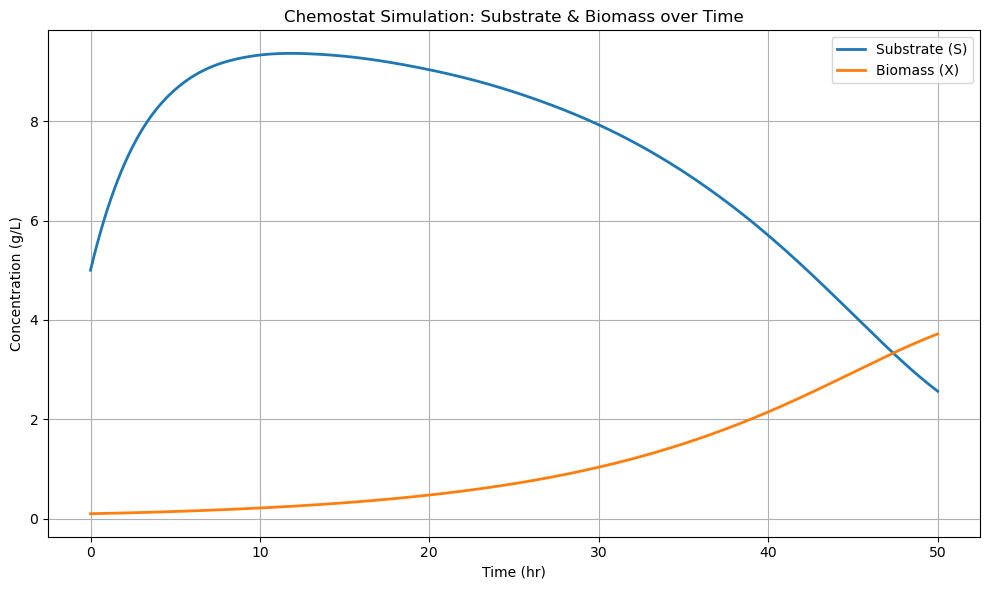

In [4]:
sol = solve_ivp(chemostat, t_span, y0, t_eval=t_eval)

#plotting
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='Substrate (S)', lw=2)
plt.plot(sol.t, sol.y[1], label='Biomass (X)', lw=2)
plt.xlabel('Time (hr)')
plt.ylabel('Concentration (g/L)')
plt.title('Chemostat Simulation: Substrate & Biomass over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
# Solve for steady-state substrate (S_ss)
def steady_state_substrate(D, mu_max, Ks):
    return (D * Ks) / (mu_max - D)

S_ss = steady_state_substrate(D, mu_max, Ks)

# Compute steady-state growth rate
mu_ss = mu_max * S_ss / (Ks + S_ss)

# Compute steady-state biomass (X_ss)
X_ss = Y * D * (S_in - S_ss)

print(f"Steady-state substrate (S): {S_ss:.3f} g/L")
print(f"Steady-state biomass (X): {X_ss:.3f} g/L")


Steady-state substrate (S): 1.500 g/L
Steady-state biomass (X): 1.275 g/L


In [6]:
# Optimization Setup

from scipy.optimize import minimize_scalar

# steady-state substrate and biomass as functions of D
def compute_productivity(D, mu_max, Ks, Y, S_in):
    if D <= 0 or D >= mu_max:  
        return -1e6 
    S_ss = (D * Ks) / (mu_max - D)
    X_ss = Y * D * (S_in - S_ss)
    P = D * X_ss
    return -P 


In [7]:
# Run the optimizer to maximize productivity
result = minimize_scalar(
    compute_productivity,
    bounds=(0.01, mu_max * 0.99),
    method='bounded',
    args=(mu_max, Ks, Y, S_in)
)

# Extract optimal D and corresponding productivity
D_opt = result.x
S_opt = (D_opt * Ks) / (mu_max - D_opt)
X_opt = Y * D_opt * (S_in - S_opt)
P_max = D_opt * X_opt

print(f" Optimal dilution rate (D): {D_opt:.3f} 1/hr")
print(f" Steady-state substrate: {S_opt:.3f} g/L")
print(f" Steady-state biomass: {X_opt:.3f} g/L")
print(f" Maximum biomass productivity: {P_max:.3f} g/L·hr")


 Optimal dilution rate (D): 0.333 1/hr
 Steady-state substrate: 2.500 g/L
 Steady-state biomass: 1.250 g/L
 Maximum biomass productivity: 0.417 g/L·hr


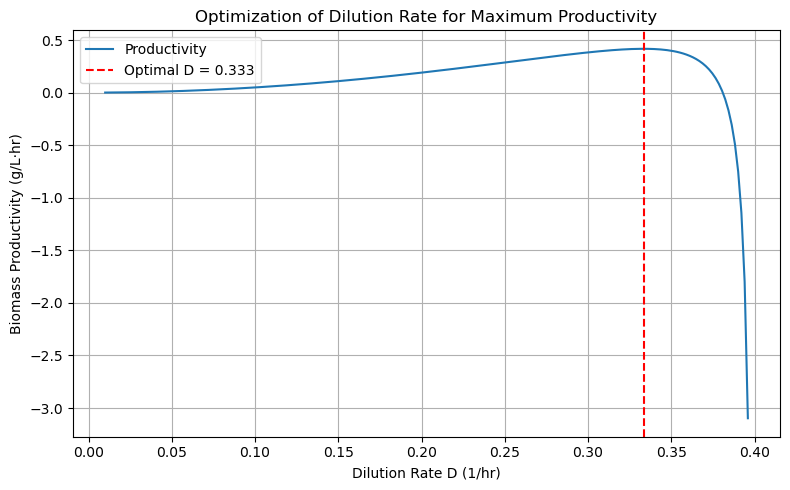

In [8]:
D_values = np.linspace(0.01, mu_max * 0.99, 200)
P_values = []

for D_test in D_values:
    S = (D_test * Ks) / (mu_max - D_test)
    X = Y * D_test * (S_in - S)
    P = D_test * X
    P_values.append(P)

plt.figure(figsize=(8, 5))
plt.plot(D_values, P_values, label='Productivity')
plt.axvline(D_opt, color='r', linestyle='--', label=f'Optimal D = {D_opt:.3f}')
plt.xlabel('Dilution Rate D (1/hr)')
plt.ylabel('Biomass Productivity (g/L·hr)')
plt.title('Optimization of Dilution Rate for Maximum Productivity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 📉 Monod Growth Curves at Different \( K_s \) Values

To understand how **substrate affinity** affects microbial growth rate, we plot the **Monod equation** using a range of \( K_s \) values:

$$
\mu(S) = \mu_{\text{max}} \cdot \frac{S}{K_s + S}
$$

Where:

- \(mu(S)\): Specific growth rate at substrate concentration \( S \)  
- \(mu_max\): Maximum specific growth rate  
- \(K_s \): Monod constant (substrate concentration at which growth rate is half-maximal)  
- \(S \): Substrate concentration  

---

### 🔍 Interpretation of the Plot

- The **blue curve** \( K_s = 0.1 \) rises very steeply — even a small amount of substrate allows the microbes to grow fast.
- The **purple curve** \( K_s = 5.0 \) rises slowly — it takes a lot of substrate for the cells to reach high growth rates.

---

### 🧠 Key Insights

- Lower \( K_s \) → better performance in nutrient-limited environments (e.g. fed-batch, chemostats).
- Higher \( K_s \) → cells are inefficient at low substrate concentrations.
- This helps explain **why productivity drops** with higher \( K_s \) in our sensitivity analysis.


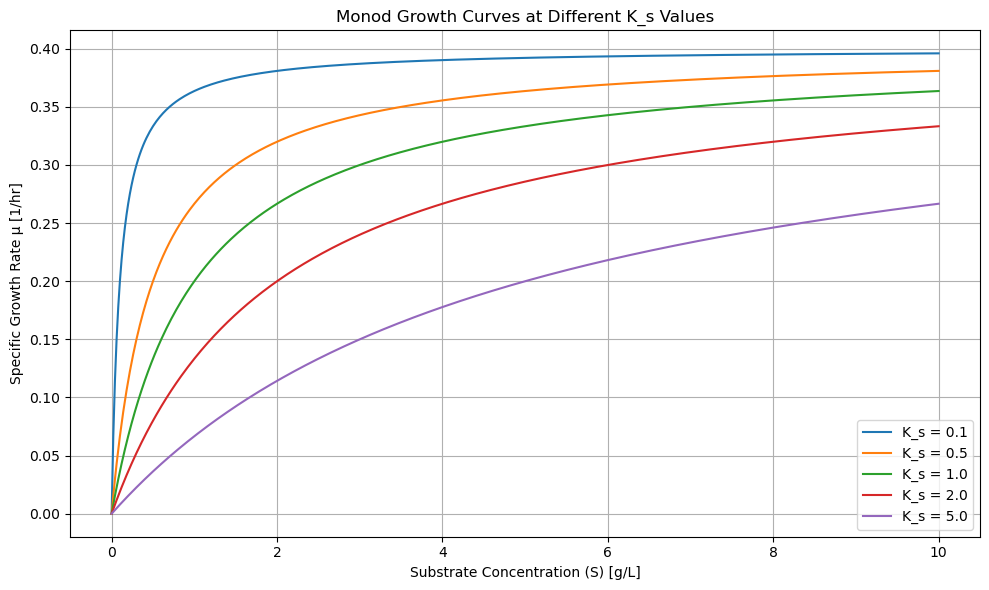

In [18]:
#Visualizing Monod Growth Curve (μ vs. S for different Ks)
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mu_max = 0.4  # 1/hr
S_range = np.linspace(0, 10, 500)  # substrate concentration range

# Different K_s values to compare
Ks_values = [0.1, 0.5, 1.0, 2.0, 5.0]

# Plotting
plt.figure(figsize=(10, 6))

for Ks in Ks_values:
    mu_values = mu_max * S_range / (Ks + S_range)
    plt.plot(S_range, mu_values, label=f'K_s = {Ks}')

plt.xlabel('Substrate Concentration (S) [g/L]')
plt.ylabel('Specific Growth Rate μ [1/hr]')
plt.title('Monod Growth Curves at Different K_s Values')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## 🔍 Sensitivity Analysis — Quality by Design Perspective

### 🎯 Objective

In this section, we assess how sensitive the **process productivity** is to key model parameters.

We specifically analyze the impact of:

- \( mu_max \): Maximum specific growth rate  
- \( K_s \): Substrate affinity (Monod constant)  
- \( Y \): Biomass yield coefficient  

We also generate a **2D heatmap** for joint effects of ( mu_max \) and \( K_s \).

---

### 📌 Why Sensitivity Analysis?

In real industrial biotech systems, biological and operational parameters can vary:

- Strains may mutate or age  
- Temperature, pH, or substrate quality may fluctuate  
- Measurement errors may introduce noise  

Understanding which parameters strongly influence performance helps us:

- Design robust, stable systems  
- Prioritize monitoring and control of critical variables  

---

### 📈 Results Overview

- Productivity **increases** with \ ( mu_max \), but with **diminishing returns**  
- Higher \( K_s \) (lower affinity) **reduces productivity** — efficiency depends on how well cells consume substrate  
- Yield \( Y \) **linearly increases productivity**, showing a strong direct relationship  

The 2D heatmap shows how productivity varies jointly with ( mu_max \) and \( K_s \), highlighting the **trade-offs in biological and operational parameters**.

---

### 🧠 Interpretation

- The process is **most sensitive** to ( mu_max \) and \( Y \)  
- Productivity steadily **decreases** as \( K_s \) increases.  
- **Maximum productivity** occurs when both high growth rate and high substrate affinity are achieved  


In [25]:
def compute_productivity_wrapped(D, mu_max, Ks, Y, S_in):
    if D <= 0 or D >= mu_max:
        return -1e6  # penalize invalid D
    S_ss = (D * Ks) / (mu_max - D)
    X_ss = Y * D * (S_in - S_ss)
    P = D * X_ss
    return -P  # negative for minimization


In [26]:
# Sensitivity to μ_max
mu_values = np.linspace(0.1, 0.9, 50)
prod_mu = []

for mu in mu_values:
    result = minimize_scalar(
        compute_productivity_wrapped,
        bounds=(0.01, mu * 0.99),
        method='bounded',
        args=(mu, Ks, Y, S_in)
    )
    prod_mu.append(-result.fun)


In [27]:
# Sensitivity to K_s
Ks_values = np.linspace(0.1, 2.0, 50)
prod_Ks = []

for ks in Ks_values:
    result = minimize_scalar(
        compute_productivity_wrapped,
        bounds=(0.01, mu_max * 0.99),
        method='bounded',
        args=(mu_max, ks, Y, S_in)
    )
    prod_Ks.append(-result.fun)


In [28]:
# Sensitivity to Yield Y
Y_values = np.linspace(0.1, 0.9, 50)
prod_Y = []

for y in Y_values:
    result = minimize_scalar(
        compute_productivity_wrapped,
        bounds=(0.01, mu_max * 0.99),
        method='bounded',
        args=(mu_max, Ks, y, S_in)
    )
    prod_Y.append(-result.fun)


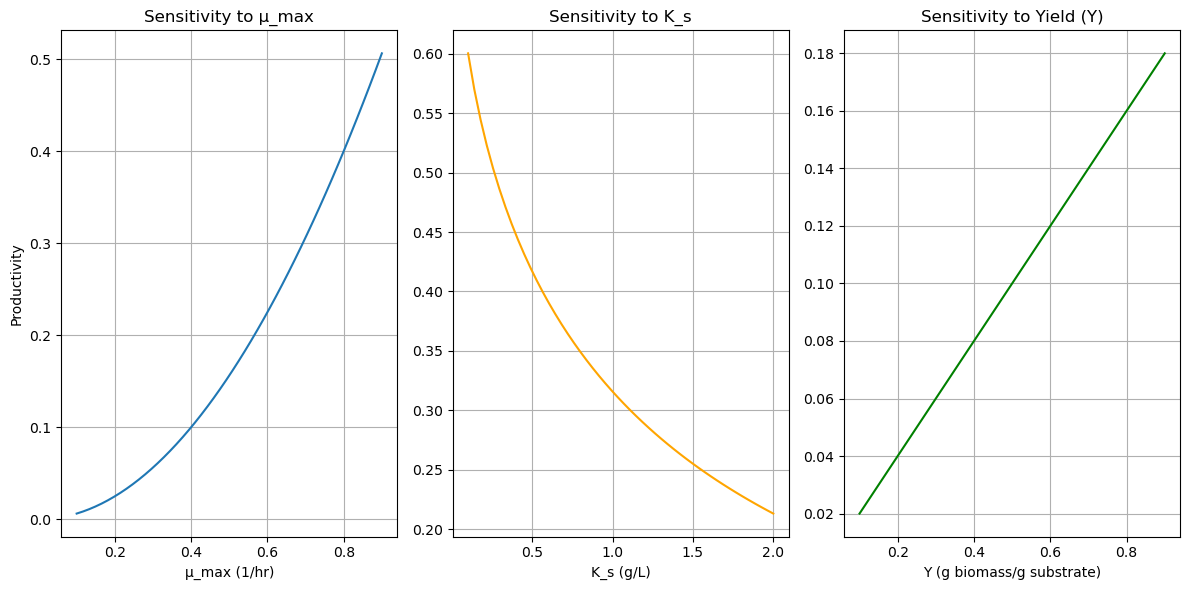

In [29]:
# plot 
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(mu_values, prod_mu, label='μ_max')
plt.xlabel('μ_max (1/hr)')
plt.ylabel('Productivity')
plt.title('Sensitivity to μ_max')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(Ks_values, prod_Ks, label='K_s', color='orange')
plt.xlabel('K_s (g/L)')
plt.title('Sensitivity to K_s')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(Y_values, prod_Y, label='Y', color='green')
plt.xlabel('Y (g biomass/g substrate)')
plt.title('Sensitivity to Yield (Y)')
plt.grid(True)

plt.tight_layout()
plt.show()


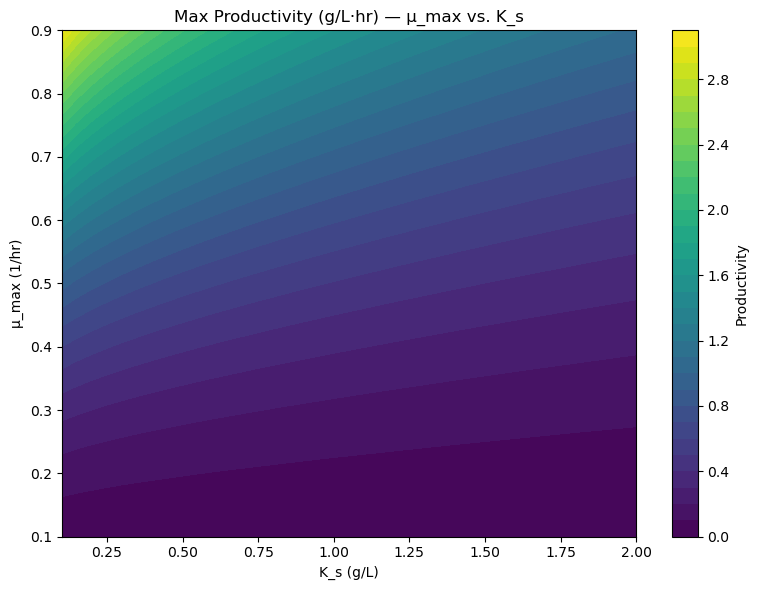

In [30]:
from matplotlib import cm

mu_grid = np.linspace(0.1, 0.9, 40)
Ks_grid = np.linspace(0.1, 2.0, 40)
P_grid = np.zeros((len(mu_grid), len(Ks_grid)))

for i, mu in enumerate(mu_grid):
    for j, ks in enumerate(Ks_grid):
        res = minimize_scalar(
            compute_productivity_wrapped,
            bounds=(0.01, mu * 0.99),
            method='bounded',
            args=(mu, ks, Y, S_in)
        )
        P_grid[i, j] = -res.fun

# Plot heatmap
plt.figure(figsize=(8, 6))
plt.contourf(Ks_grid, mu_grid, P_grid, levels=30, cmap=cm.viridis)
plt.xlabel('K_s (g/L)')
plt.ylabel('μ_max (1/hr)')
plt.title('Max Productivity (g/L·hr) — μ_max vs. K_s')
plt.colorbar(label='Productivity')
plt.tight_layout()
plt.show()
